# Introduction

Ce Notebook a pour but de: 
- déterminer les 3 premiers pics du diffractogramme du matériau qui m'a été attribué pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å.
- d'y indiquer les indices hkl associés

Le matériau qui m'a été attribué est le CsNdTe2 (mp-11742).

### (0) importation des modules nécessaires

In [51]:
# main sources for this exercice
# https://pymatgen.org/_modules/pymatgen/analysis/diffraction/xrd.html
# https://pymatgen.org/pymatgen.analysis.diffraction.xrd.html

from pymatgen.analysis.diffraction.xrd import *
from pymatgen import Lattice, Structure
from pymatgen.analysis.diffraction.xrd import XRDCalculator

# On télécharge le fichier cif de la maille conventionnelle 
structure = Structure.from_file("CsNdTe2_mp-11742_symmetrized.cif")
    
# On récupère le diagramme de diffration
# wavelength='CuKa' => λ = 1.54060 Å
XRDCalculator = XRDCalculator(wavelength='CuKa', symprec=0, debye_waller_factors=None)

# ici, on a normalisé les intensités des pics (maximum d'intensité = 100% en intensité)
list_of_peak_1 = XRDCalculator.get_pattern(structure, scaled=True, two_theta_range=(0, 90))

# ici, on n'a pas normalisé les intensités des pics
list_of_peak_2 = XRDCalculator.get_pattern(structure, scaled=False, two_theta_range=(0, 90))

### (1) détermination du premier pic

In [52]:
peak1 = list_of_peak_1.intensity[0]
peak12 = list_of_peak_2.intensity[0]
angle1 = list_of_peak_1.x[0]

print("----------Données Brutes----------")
print(" Angle ( 2 Theta) :", angle1)
print(" intensité (%):", peak1)
print(" intensité (non-normalisée) :", peak12)
print(" indices de la famille de plan de diffraction: ", list_of_peak_1.hkls[0])
print("distance entre les plans de diffraction de la même famille:", list_of_peak_1.d_hkls[0], "(Angstrom)")

----------Données Brutes----------
 Angle ( 2 Theta) : 9.879552763530462
 intensité (%): 11.35129553094325
 intensité (non-normalisée) : 7662622.959682345
 indices de la famille de plan de diffraction:  [{'hkl': (0, 0, 0, 3), 'multiplicity': 2}]
distance entre les plans de diffraction de la même famille: 8.952881043333333 (Angstrom)


### (2) détermination du second pic

In [53]:
peak2 = list_of_peak_1.intensity[1]
peak22 = list_of_peak_2.intensity[1]
angle2 = list_of_peak_1.x[1]

print("----------Données Brutes----------")
print(" Angle ( 2 Theta) :", angle2)
print(" intensité (%):", peak2)
print(" intensité (non-normalisée) :", peak22)
print(" indices de la famille de plan de diffraction: ", list_of_peak_1.hkls[1] )
print("distance entre les plans de diffraction de la même famille:", list_of_peak_1.d_hkls[1], "(Angstrom)")

----------Données Brutes----------
 Angle ( 2 Theta) : 19.833512313345278
 intensité (%): 1.7453334110925882
 intensité (non-normalisée) : 1178176.696367578
 indices de la famille de plan de diffraction:  [{'hkl': (0, 0, 0, 6), 'multiplicity': 2}]
distance entre les plans de diffraction de la même famille: 4.4764405216666665 (Angstrom)


### (3) détermination du troisième pic

In [54]:
peak3 = list_of_peak_1.intensity[2]
peak32 = list_of_peak_2.intensity[2]
angle3 = list_of_peak_1.x[2]

print("----------Données Brutes----------")
print(" Angle ( 2 Theta) :", angle3)
print(" intensité (%):", peak3)
print(" intensité  (non-normalisée):", peak32)
print(" indices de la famille de plan de diffraction: ", list_of_peak_1.hkls[2] )
print("distance entre les plans de diffraction de la même famille:", list_of_peak_1.d_hkls[2], "(Angstrom)")

----------Données Brutes----------
 Angle ( 2 Theta) : 22.16600752777872
 intensité (%): 0.12529435920864848
 intensité  (non-normalisée): 84579.1945926984
 indices de la famille de plan de diffraction:  [{'hkl': (1, 0, -1, 1), 'multiplicity': 12}]
distance entre les plans de diffraction de la même famille: 4.010386112885685 (Angstrom)


### (4) remarques

Les 3 premiers pics trouvés concordent avec ceux obtenus sur materials project. Cependant, l'intensité du 3ième pic est extremement faible, et n'est pas reprise dans le diffractogramme de Materials Project. Le pic de Bragg le plus intense est le 5ième pic.

#### https://materialsproject.org/materials/mp-11742/


### (4) affichage du diffractogramme

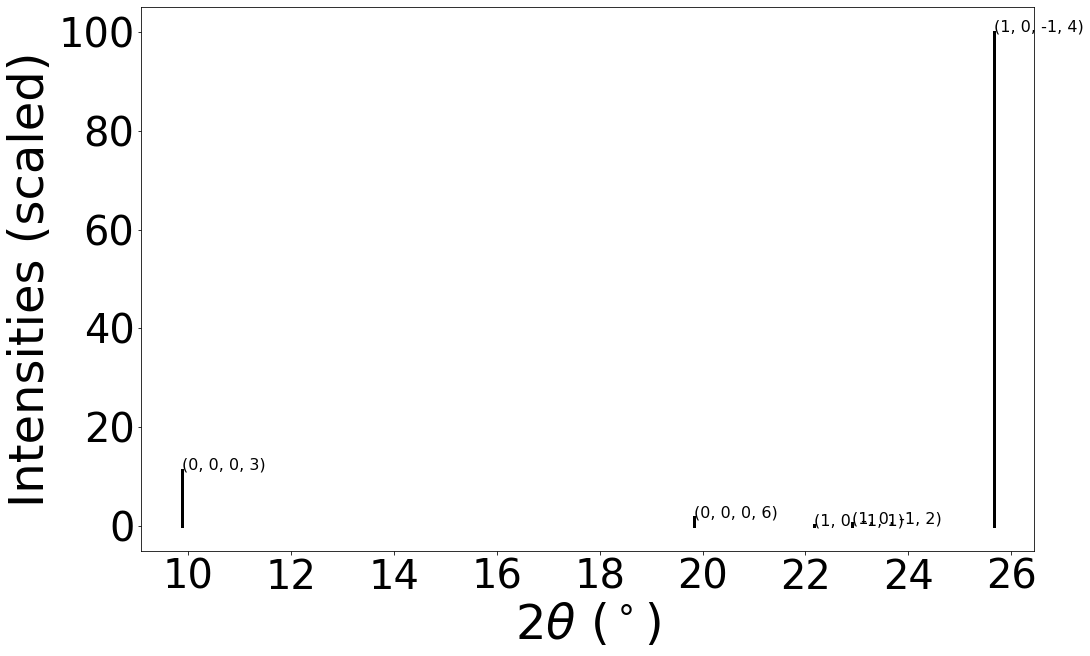

In [59]:
XRDCalculator.show_plot(structure,two_theta_range=(0,26),annotate_peaks=True,ax=None,with_labels=True)